<a href="https://colab.research.google.com/github/Anaya666/Anaya666/blob/main/Copy_of_Project4_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 3025 Final Project: Neural Network From Scratch

**General Instructions:** For this project, you will be creating the code for a simple Neural Network from scratch. The beginning portion of the project will match closely with what we have completed together during Lab. You will first create some helper functions then the larger building blocks of the network. After creating the network, you will be asked to tweak different pieces and run experiments to demonstrate your understanding of the underlying code.

**Type the Honor Pledge Here:**
On my honor I have completed this project without unauthorised aid.

### Tips for Success on this Project:
- use `print` statements to debug your code
- code small helper functions first and check if correct by running practice tests
- check if matrices are the **correct dimension for matrix multiplication** by printing the matrix or printing the dimension of the matrix (may need to transpose by using `matrix.T` in some cases)
- make sure you understand the math behind feeding forward and backpropogating before implementing the `feed_forward` and `gradient` functions
- The internet is your friend! Look up unknown python syntax and error messages  
- Other potentially useful functions: `np.dot`, `np.random.normal`, `np.exp`, `pd.DataFrame`
- Ensure your cost function is correct (it might be different from lab). Ensure you are doing MSE and dividing by the length of the each dataset at the proper time

### Additional Help with Python Coding:
Reach out to Ali Rivera (wat6sv@virginia.edu)! She is very nice and hosts python office hours from 12-1 on Wednesdays in Room 300 (she has snacks!)

### Grading

* Only build off of the code and functions given to you in lab.
* Do not import any additional modules/functions aside from the ones given at the beginning of the project.
* Do not use any additional data aside from what we define to be X and Y in the beginning for your training. You will receive a 0 if you add columns or create new testing data in any way.
* Points will be deducted if your code is not reproducible. I.e. your output should look the same as when we run your uploaded notebook in google colab (remember to keep your random seed as we have set it to 42). Before you submit - restart your kernel in Google Colab and run all of your code from bottom to top - if nothing changes, you are good to go.
* Points will be deducted for redundant code, i.e. repeating function definitions in every code block. Note: Re-defining functions to add new parts is not considered redundant code.
* Your code has to work, but we are focused more on the summmary and explainations we ask you about the code. We want to know that you understand the ideas behind the code. When in doubt, document your through process and resources used. If you run into issues, detail them in your submission so we can give you partial credit.
* We will be testing your final model parameters on a synthetic dataset we have generated from the one you are given. Your model's accuracy on this new test set will be recorded and ranked across students from both sections. Your overall grade will be affected by where you fall in this rank. In order to perform well on this, you will need to ensure that your model's test accuracy is as high as possible without overfitting or underfitting your model.
* A ruberic with more specific details on grade brackets will follow.

# Project Overview

## Part 1:
Your goal for Part 1 will be to carefully copy over functions from Lab 11 & 12 and ensure all your functions are in working order for this particular data set and problem. The steps for this part will include:

- Load your data
- Define your helper funtions
- Create your "Major" functions (1 Hidden Layer Network)
- Test your network with the functions you created given a defined set of parameters

## Part 2:
Your goal for Part 2 will be to build off of the functions built in Lab (Part 1). This will include:

- Adding a new activaiton function (Hyperbolic Tangent)
- Creating a new neural network (2 Hidden Layer Network)
- Comparing the performance of the 1 vs 2 Hidden Layer Network.

## Part 3: Experimentation/Parameter Tuning (with 1-layer model)

For this section, you will be conduct 4 different experiments that test:
- A Baseline model
- Varying the Activation Functions
- Varying the Learning Rate
- Varying the \# of Hidden Layer Nodes

From each of these experiments, you will produce a graph, table, and summary.

## Part 4: Further Experimentation/Parameter Tuning

In this part you will experiment further to find the values of the parameters (activation function, epochs, learning rate, hidden nodes) that best train your model to produce the highest test accuracy ON OUR SYNTHETIC DATASET. This means that you need to find the parameters that not only produce the best test accuracy but also don't overfit the training data.

## Part 5: Comprehension Questions

You will be asked 3 comprehension questions, 2 will require code for you to answer.

#### Imports

In [4]:
#### DO NOT ADJUST ####
# The only libraries we will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.datasets import load_iris
import time

In [5]:
#### DO NOT ADJUST ####
# Define seed
seed = 42

### Load Data

For this project, we're using a new dataset to classify wine type between red and white. We have the following measurements of each wine "subject" (`fixed acidity`, `volatile acidity`, `residual sugar`, `chlorides`, `alcohol`, `quality`). Our goal is to predict the type of wine (red or white). This means we are dealing with a binary classification problem. Our model will output a probability that it a red wine (because red is coded as 1).

Below is the code to load in the data sets to X and Y. Do **not** change the code below.

In [6]:
#### DO NOT ADJUST ####

## Load in the Wine Quality Data
red = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/refs/heads/master/winequality-red.csv', sep =';')
white = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/refs/heads/master/winequality-white.csv', sep =';')

# Random sample to decrease the sample size of red and white to 200 per class
red = red.sample(200, random_state=seed)
red.drop(['density', 'pH', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates'], axis = 1, inplace = True)
white = white.sample(200, random_state=seed)
white.drop(['density', 'pH', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates'], axis = 1, inplace = True)
print(white.columns)

# add columns for classification
red['type'] = 0
white['type'] = 1

# combine the data frames
X = pd.concat([red, white], axis=0)

# Now seperate X and Y
Y = X['type']
X = X.drop('type', axis=1)


Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'alcohol', 'quality'],
      dtype='object')


# Part 1
Your goal for Part 1 will be to ensure all of your functions are in working order and lay the groundwork for what ranges your experimentation in Part 2 should fall in

- Convert your data to numpy and train/test split
- Define your helper funtions
- Create your "Major" functions (1 Hidden Layer Network)
- Test your network with the functions you created given a defined set of parameters

### Q1 (a) . Split the data into test (`X_test`, `Y_test`) and train (`X_train`, `Y_train`) datasets. Standardize the training and testing data. ENSURE THAT YOUR VARIABLES ARE NAMED CORRECTLY

In [7]:
# Convert X and Y from pandas to numpy arrays
X=X.to_numpy()
Y=Y.to_numpy()

# Train/test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

# Standardize X_train and X_test
X_train=normalize(X_train)
X_test=normalize(X_test)


# Reshape Y_train and Y_test to nx1 matrices
Y_train=Y_train.reshape(len(Y_train),1)
Y_test=Y_test.reshape(len(Y_test),1)

#### DO NOT ADJUST ####
# Check X Train and Test Shapes
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}') #notice how there's a 1 in the column space after reshaping
print(f'Y_test shape: {Y_test.shape}') #notice how there's a 1 in the column space after reshaping

X_train shape: (320, 6)
X_test shape: (80, 6)
Y_train shape: (320, 1)
Y_test shape: (80, 1)


####**Q1 (b): What is going to be your number of input and output nodes - **Why? (be careful with your reasning for your output nodes)****

**Answer:**
input_nodes = 6: there are six features in the dataset which become inputs into the network
output_nodes= 1: it is a binary classification problem where there can be either red or white wine

### Create the following Helper Functions:

Pay close attention to the formulas and directions. Do not change the names of these functions.

1. `sigmoid(x)`
1. `sigmoid_derivative(x)`
1. `relu(x)`
1. `relu_derivative(x)`
1. `ActivationFxn(x, activation_type)`
1. `ActivationFxnDerivative(x, activation_type)`
1. `cost(y, y_hat)`

#### Q3. Create a function called `sigmoid(x)`.

This will be one of your **activation functions** that takes some vector `x` and returns the sigmoid of the vector. The `sigmoid` function can be written as:

\begin{gather}
  \sigma(x) = \frac{1}{1 + e^{-x}}
\end{gather}

In [8]:
def sigmoid(x):
  return 1/(1+np.exp(-x))


#### Q4. Create a function called `sigmoid_derivative(x)`.

This function will calculate the derivative of the activation function for backpropogation in the network at some point, `x`. The function should return the derivative of the sigmoid function at that point. The derivative of the Sigmoid function is written as:

\begin{gather}
  \sigma^\prime (x) = \sigma(x) * (1 - \sigma(x))
\end{gather}

In [9]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

#### Q5. Create a function called `relu(x)`.

This function will calculate and return the `ReLU` of some input value `x`. The ReLU function can be written as:

\begin{gather}
  \sigma(x) = \begin{cases} x, & x > 0 \\ 0, & x \leq 0 \end{cases} = max(0, x)
\end{gather}

In [10]:
def relu(x):
  return x*(x>0)

#### Q6. Create a function called `relu_derivative(x)`.

This will calculate the derivative of the `ReLU` function for the given input. The derivative of ReLU can be written as:

\begin{gather}
  \sigma^{\prime}(x) = \begin{cases} 1, & x > 0 \\ 0, & x \leq 0 \end{cases}
\end{gather}

In [11]:
def relu_derivative(x):
  return 1*(x>0)


#### Q7. Create a function called `ActivationFxn(x, activation_type)`.

This will be a function that combines the two activation functions that you defined above. Given the activation type determined by `activation_type` (either `sigmoid` or `relu` for now), the function should calculate the activation function of the value `x`. Hint: You can use `if` statements to check for what type of `acitvation_type` the user wants. Make sure to have a condition for when the provided `activation_type` is not valid.

In [12]:
# Combine your activation functions into one function
def ActivationFxn(x, activation_type):
  if activation_type == 'relu':
    return relu(x)               # RELU
  elif activation_type == 'sigmoid':
    return sigmoid(x)      # Sigmoid
  else:
    print('Error: Acitvation Function Type not valid')


#### Q8. Create a function called `ActivationFxnDerivative(x, activation_type)`.

This will be a function that combines the two activation functions derivatives that you defined above. Given the activation type determined by `activation_type` (either `sigmoid` or `relu` for now), the function should calculate the activation function derivative of the value `x`. Hint: You can use `if` statements to check for what type of `acitvation_type` the user wants. Make sure to have a condition for when the provided `activation_type` is not valid.

In [13]:
def ActivationFxnDerivative(x, activation_type):
    if activation_type == 'relu':
        return relu_derivative(x)               # ReLU derivative
    elif activation_type == 'sigmoid':
        return sigmoid_derivative(x)            # Sigmoid derivative
    else:
        print('Error: Activation Function Type not valid')
        return None


#### Q9. Create a function called `cost(y, y_hat)`.

For this function, `y` is the true wine type and `y_hat` is the predicted probability of a red wine. The equation should use is:

\begin{gather}
  \text{cost}(x) = \sum (y - y\_\text{hat})^2
\end{gather}


In [14]:
def cost(y, y_hat):
  return np.sum((y-y_hat)**2)



### Major Functions

Congratulations! You've finished creating the helper functions that we will need throughout building this neural network. Next, we will work on the larger functions that we will need. The list of the functions you will develop is shown below along with each of the inputs they will take.

1. `forward_propagation(x, activation_type)`
1. `output(X, activaiton_type)`
1. `gradient(x, y, a1, a2, activation_type)`
1. `train(inputs, outputs, learning_rate, epochs, activation_type)`
1. `test(inputs, outputs, activation_type)`
1. `GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)`

#### Q10. Create a function called `forward_propogation(x, activation_type)`.

The function should take an input vector `x` and apply a linear transformation and the specified activation function for the input layer to the hidden layer. The function should return the output values from the input to hidden neurons and hidden to output neuron(s). For example, the output of the 1st pass (input to hidden) could be called `z1` for before activation and `a1` = $(a_{11}, a_{12}, a_{13})$ for after activation. Likewise, the 2nd pass (output from the hidden to output) could be called `z2` before activation and `a2` = $(a_{21})$ after.

In [15]:
def forward_propagation(x, activation_type):
  #input layer to hidden layer
  z1 = np.dot(W1, x) + b1
  a1 = ActivationFxn(z1, activation_type)

  #hidden layer to output layer
  z2 = np.dot(W2, a1) + b2
  a2 = ActivationFxn(z2, activation_type)

  # 3. outputs of both layers
  return a1, a2, z1, z2



### Q11. Create a function called `output(X, activation_type)`.

The function should take in a data matrix, `X`. It should loop over each row of the matrix, `X`. For each row or sample, calculate the forward propogation using the function you defined above and the activation function determined by `activation_type`. Catch all elements that the `forward_propogation` function returns. Save the final output from the output layer, `a2`, into a list. The `output()` function should ultimately return this list of outputs. For a sanity check, you can make sure that the output list is the same length as the number of rows in `X`.

In [16]:
def output(X, activation_type):
  out = np.array([])
  for j in range(X.shape[0]):
      x = X[j].reshape(input_nodes, 1)
      a1, a2, z1, z2 = forward_propagation(x, activation_type)
      out = np.append(out,a2)
  return out

#### Q12. Create a function to calculate the gradient of the network. This function should be called `gradient(x,y,a1,a2,z1, z2, activation_type)`.

It should take inputs `x`, `y`, `a1`, `a2`, `z1`, and `z2`. `x` is the input data to the layer. This is a given row of our data matrix. `y` is the true value of the wine class. `z1` is the value calculated from the pass from the input layer to the output layer before activation. `a1` is the result of `z1` being passed into the activation function. `z2` is the value from the hidden layer to the output layer before activation. `a2` is the reuslt from passing `z2` into the activation function and represents what the prediction is. Overall, this function should calculate what the gradient is for each weight and bias. For equations, refer back to Lab 11 & 12. The function should return the direction of the gradient for each weight matrix, labeled `dW1`, `dW2`, and biases labeled `db1`, `db2`.

In [17]:
def gradient(x, y, a1, a2, z1, z2, activation_type):
  # Find the derivative of the second part
  delta2 = (a2 - y) * ActivationFxnDerivative(z2, activation_type)
  dW2 = np.dot(delta2, a1.T)
  db2 = delta2

  # Find the derivative of the first part
  delta1 = np.dot(W2.T, delta2) * ActivationFxnDerivative(z1, activation_type)
  dW1 = np.dot(delta1, x.T)
  db1 = delta1

  # return each of the derivatives
  return dW1, db1, dW2, db2

#### Q13. Create a function that trains the network. It should be called `train(x_train, y_train, x_test, y_test, learning_rate, epochs, activation_type)`.

The function should apply each of the helper functions you defined before in the correct order. The function should return the cost values for both the training and testing data in lists.

In [54]:
def train(x_train, y_train, x_test, y_test, learning_rate, epochs, activation_type):

  global W1
  global b1
  global W2
  global b2

  train_cost = []
  test_cost = []

  for i in range(epochs):
      # gradient vectors initialised
      dW1 = np.zeros_like(W1)
      db1 = np.zeros_like(b1)
      dW2 = np.zeros_like(W2)
      db2 = np.zeros_like(b2)

      train_costs = 0

      # looping over each sample to get the gradient
      for j in range(x_train.shape[0]):

          # Reshape the data
          x = x_train[j].reshape(input_nodes, 1)
          y_true = y_train[j].reshape(output_nodes, 1)

          # forward propogation
          a1, a2, z1, z2 = forward_propagation(x, activation_type)

          # cost
          row_cost = mse(y_true, a2) #remember what your mse is calculating
          train_costs += row_cost

          # gradient
          dW1__j, db1__j, dW2__j, db2__j = gradient(x, y_true, a1, a2, z1, z2, activation_type)

          # accumulating gradients for samples
          dW1 += dW1__j
          db1 += db1__j
          dW2 += dW2__j
          db2 += db2__j

      # test costs
      y_test_pred = output(x_test, activation_type)  # Forward pass for test set
      test_cost_val = mse(y_test, y_test_pred.reshape(-1, 1)) #remember what your mse is calculating
      test_cost += [test_cost_val]

      # Average the gradients over all samples
      dW1 /= X.shape[0]
      db1 /= X.shape[0]
      dW2 /= X.shape[0]
      db2 /= X.shape[0]

      # updating weights and biases
      W1 -= learning_rate*dW1
      b1 -= learning_rate*db1
      W2 -= learning_rate*dW2
      b2 -= learning_rate*db2


      train_cost += [train_costs]

  return train_cost, test_cost

#### Q14. Create a function to test your network. It should be called `test(inputs, outputs, activation_type)`.

You can run the function after training to see if neural network works well on other data points that it didn't see during training. For inputs, it should take in test `inputs` (x values) and `outputs` (y values) and print the `percent_correct`.

In [55]:
def test(inputs, outputs, activation_type):
    correct = 0 #this line and the following lines in the function need to be indented
    for x,y in zip(inputs,outputs):
        x = np.reshape(x, (len(x),1))
        a1, a2, z1, z2 = forward_propagation(x, activation_type)
        if (a2 >.5) & (y ==1):
            correct = correct + 1
        elif (a2<=.5) & (y == 0):
            correct = correct + 1
    print("percent correct:", 100*correct/len(inputs))

#### Q15. Create a function that initializes the values of the weights `W1`, `W2` and biases `b1`, `b2`. It should be called `GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)`

**NOTE**: make sure to re-run `GenerateAllWeights` each time you train the network (otherwise `train` function will have edited the matices and you want them to start random)

In [56]:
def GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed):
  np.random.seed(seed)
  W1 = np.random.randn(hidden_nodes, input_nodes)
  W2 = np.random.randn(output_nodes, hidden_nodes)
  b1 = np.zeros((hidden_nodes, 1))
  b2 = np.zeros((output_nodes, 1))

  return W1, W2, b1, b2

### Q16. Train the Network, putting all of your functions together

Next, we will put all of our functions together to actually train the neural network. Start by defining the number of epochs and the learning rate. For this part, use values of `hidden_nodes=3`, `epochs=500`, `learning_rate=0.1`, and `activation_type = 'sigmoid'`. Once the parameters are set, go ahead and define your weights, train the network, and plot the MSE for the training and testing set respecively.

In [57]:
# Define the number of input, hidden, and output nodes (note: nodes not layers)
input_nodes =6
hidden_nodes =3
output_nodes =1

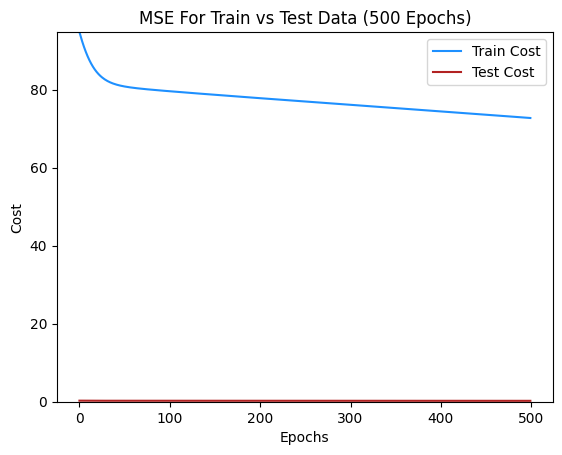

In [58]:
# Define your parameters
epochs = 500
learning_rate = 0.1
activation_type = 'sigmoid'
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define your weights and biases
W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)
# Train your network
train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)


# Adjust costs where necessary (be mindful of what your cost function is calculating)


#### DO NOT ADJUST ####
plt.plot(np.arange(epochs), train_cost, label = 'Train Cost', color = 'dodgerblue')
plt.plot(np.arange(epochs), test_cost, label = 'Test Cost', color = 'firebrick')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title(f'MSE For Train vs Test Data ({epochs} Epochs)')
plt.ylim([0, np.max([np.max(test_cost), np.max(train_cost)])])
plt.legend()
plt.show()

#### Q17. Test the Network after Training

Now that you've trained the model, we can test it. Use the `test` function on the `x_test` and `y_test` values.

In [59]:
test(X_test, Y_test, activation_type)

percent correct: 82.5


# Part 2
Your goal for Part 2 will be to build off of the functions built in Lab 11 & 12 (Part 1).

- Re-define your activation function**s** by adding the Hyperbolic Tangent (`tanh`)
- Create fucntions for forward propogation, output, gradient, and train that allow for a second hidden layer
- Compare your 2-hidden-layer model to your 1-hidden-layer model (using the same parameters)

### Creating a New Activation Function

### Q1. There are other activation functions than just Sigmoid and ReLU. One we talked about in class is the Hyperbolic Tangent function `tanh()`. Create a new function called `tanh()`.

Note: for this question, and this question only, you are restricted to only using the `np.exp()` function from Numpy. Do **not** directly use `np.tanh()` for this question.

Hint: The equation for the hyperbolic tangent is:

\begin{gather}
  \sigma(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{gather}

In [29]:
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))


#### Q2. Plot your activation function for $X \in [-10, 10]$ with 100 data points. This is a way to confirm that your function behaves how the hyperbolic tanh does.

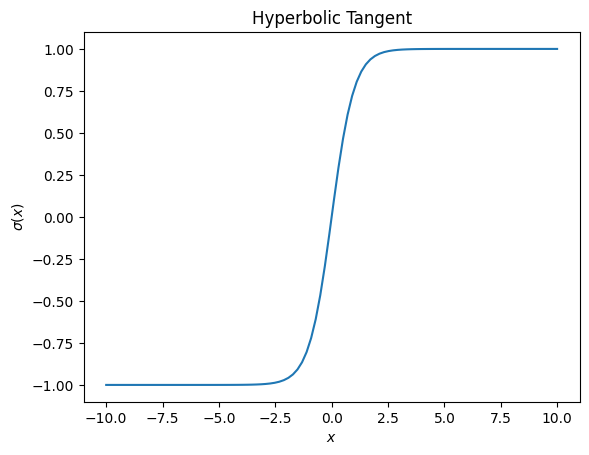

In [30]:
# create X vector as described above (refer to Lab 12 for help) to define the first parameter of the plot
X = np.linspace(-10, 10, 100)

# call your tanh function on X to define the second parameter of the plot
tanh_vals = tanh(X)

# use the function you just created for tanh to define the second parameter of the plot


#### DO NOT ADJUST ####
plt.plot(X, tanh_vals)
plt.title(r'Hyperbolic Tangent')
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
plt.show()

#### Q3. Using your `tanh()` function, add it to the `ActivationFxn()` function. The `activation_type` parameter should be `tanh`.

In [31]:
# Add tanh as an option to your ActivationFxn (after relu and sigmoid)
def ActivationFxn(x, activation_type):
    if activation_type == 'relu':
        return relu(x)
    elif activation_type == 'sigmoid':
        return sigmoid(x)
    elif activation_type == 'tanh':
        return tanh(x)
    else:
        print('Error: Activation Function Type not valid')
        return None



#### Q4. Define a `tanh_derivative()` function.

The derivative of the hyperbolic tangent is the hyperbolic secant. The function can be defined as:

\begin{gather}
  \sigma^{\prime} (x) = \frac{2}{e^{x} + e^{-x}}
\end{gather}

In [32]:
def tanh_derivative(x):
  return 2/(np.exp(x)+np.exp(-x))


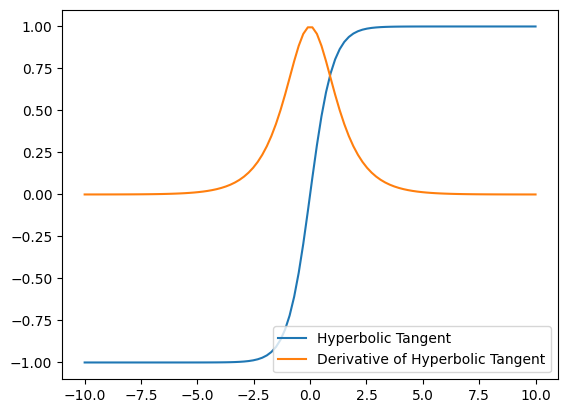

In [33]:
# Call the tanh function on X (X is already defined above) to define the parameter needed for the first plot
tanh_values= tanh(X)
# Call the tanh derivative function on X to define the parameter needed for the second plot
tanh_derivative_values= tanh_derivative(X)

#### DO NOT ADJUST ####
plt.plot(X, tanh_values, label = 'Hyperbolic Tangent')
plt.plot(X, tanh_derivative_values, label = 'Derivative of Hyperbolic Tangent')
plt.legend()
plt.show()

#### Q5. Add the `tanh_derivative()` to the `ActivaitonFxnDerivative()` function. The `activation_type` value should be called `tanh`.

In [34]:
def ActivationFxnDerivative(x, activation_type):
    if activation_type == 'relu':
        return relu_derivative(x)
    elif activation_type == 'sigmoid':
        return sigmoid_derivative(x)
    elif activation_type == 'tanh':
        return tanh_derivative(x)
    else:
        print('Error: Activation Function Type not valid')
        return None


### Creating a 2 Hidden Layer Network

#### Q6. Edit your network to include an additional hidden layer. This includes adding more weights and biases. Add a suffix `2` to the end of each function to indicate that it is the function for your 2 hidden layer network. The functions for you to change are:

* `GenerateAllWeights()` $\rightarrow$ `GenerateAllWeights_2()`
* `forward_propogration()` $\rightarrow$ `forward_propagation_2()`
* `output()` $\rightarrow$ `output_2()`
* `gradient()` $\rightarrow$ `gradient_2()`
* `train()` $\rightarrow$ `train_2()`
* `test()` $\rightarrow$ `test_2()`

NOTE: Be careful to use the new functions with a suffix of `2` when you want to work with the 2 hidden layer network. If you accidentatly use the original functions with no suffix, you will run into errors. If you have errors that you run into, make sure to double check that you're using the new functions in all of the necessary positions.

Start with both hidden layers containing `3` nodes.

In [35]:
# define network structure
input_nodes =6
first_hidden_nodes =3
second_hidden_nodes =3
output_nodes =1

In [45]:
def GenerateAllWeights_2(input_nodes, first_hidden_nodes, second_hidden_nodes, output_nodes, seed):
  np.random.seed(seed)
  W1 = np.random.randn(first_hidden_nodes, input_nodes)
  W2 = np.random.randn(second_hidden_nodes, first_hidden_nodes)
  W3 = np.random.randn(output_nodes, second_hidden_nodes)
  b1 = np.zeros((first_hidden_nodes, 1))
  b2 = np.zeros((second_hidden_nodes, 1))
  b3 = np.zeros((output_nodes, 1))
  return W1, W2, W3, b1, b2, b3




In [46]:
def forward_propagation_2(x, activation_type):
  z1 = np.dot(W1, x) + b1
  a1 = ActivationFxn(z1, activation_type)
  z2 = np.dot(W2, a1) + b2
  a2 = ActivationFxn(z2, activation_type)
  z3 = np.dot(W3, a2) + b3
  a3 = ActivationFxn(z3, activation_type)
  return a1, a2, a3, z1, z2, z3



In [47]:
def output_2(X, activation_type):
  out = np.array([])
  for j in range(X.shape[0]):
      x = X[j].reshape(input_nodes, 1)
      a1, a2, a3, z1, z2, z3 = forward_propagation_2(x, activation_type)
      out = np.append(out,a3)
  return out


In [48]:
def gradient_2(x, y, a1, a2, a3, z1, z2, z3, activation_type):
  delta3 = (a3 - y) * ActivationFxnDerivative(z3, activation_type)
  dW3 = np.dot(delta3, a2.T)
  db3 = delta3
  delta2 = np.dot(W3.T, delta3) * ActivationFxnDerivative(z2, activation_type)
  dW2 = np.dot(delta2, a1.T)
  db2 = delta2
  delta1 = np.dot(W2.T, delta2) * ActivationFxnDerivative(z1, activation_type)
  dW1 = np.dot(delta1, x.T)
  db1 = delta1
  return dW1, db1, dW2, db2, dW3, db3


In [49]:
def train_2(x_train, y_train, x_test, y_test, learning_rate, epochs, activation_type):
  global W1
  global b1
  global W2
  global b2
  global W3
  global b3

  train_cost_2 = []
  test_cost_2 = []

  for i in range(epochs):
      dW1 = np.zeros_like(W1)
      db1 = np.zeros_like(b1)
      dW2 = np.zeros_like(W2)
      db2 = np.zeros_like(b2)
      dW3 = np.zeros_like(W3)
      db3 = np.zeros_like(b3)

      train_costs_2 = 0

      for j in range(x_train.shape[0]):

          x = x_train[j].reshape(input_nodes, 1)
          y_true = y_train[j].reshape(output_nodes, 1)

          a1, a2, a3, z1, z2, z3 = forward_propagation_2(x, activation_type)

          row_cost = cost(y_true, a3)


          train_costs_2 += row_cost

          dW1_j, db1_j, dW2_j, db2_j, dW3_j, db3_j = gradient_2(x, y_true, a1, a2, a3, z1, z2, z3, activation_type)

          dW1 += dW1_j
          db1 += db1_j
          dW2 += dW2_j
          db2 += db2_j
          dW3 += dW3_j
          db3 += db3_j

      y_test_pred = output_2(x_test, activation_type)
      test_cost_val = cost(y_test, y_test_pred.reshape(-1, 1))

      test_cost_2 += [test_cost_val]

      dW1 /= X.shape[0]
      db1 /= X.shape[0]
      dW2 /= X.shape[0]
      db2 /= X.shape[0]
      dW3 /= X.shape[0]
      db3 /= X.shape[0]

      W1 -= learning_rate*dW1
      b1 -= learning_rate*db1
      W2 -= learning_rate*dW2
      b2 -= learning_rate*db2
      W3 -= learning_rate*dW3
      b3 -= learning_rate*db3

      train_cost_2 += [train_costs_2]

  return train_cost_2, test_cost_2

In [50]:
def test_2(inputs, outputs, activation_type):
    correct = 0
    for x,y in zip(inputs,outputs):
        x = x.reshape(len(x), 1)
        a1, a2, a3, z1, z2, z3 = forward_propagation_2(x, activation_type)

        if (a3 > 0.5) and (y == 1):
          correct += 1

        elif (a3 <= 0.5) & (y == 0):
          correct += 1

    print("Percent correct:", 100 * correct / len(inputs) )


####Q7. Now that you've defined your functions, train your new 2 layer network. Plot the training and testing errors. Use parameters of `learning_rate=0.1`, `epochs=500`, and `activation_type = 'sigmoid'`.

Make sure to name your outputs from train_2 `train_cost_2` and `test_cost_2` so as not to overwrite your train_cost and test_cost values from your 1-layer model! (If you do overwrite these values, make sure to go back and re-run your 1 hidden layer model training code chunk)

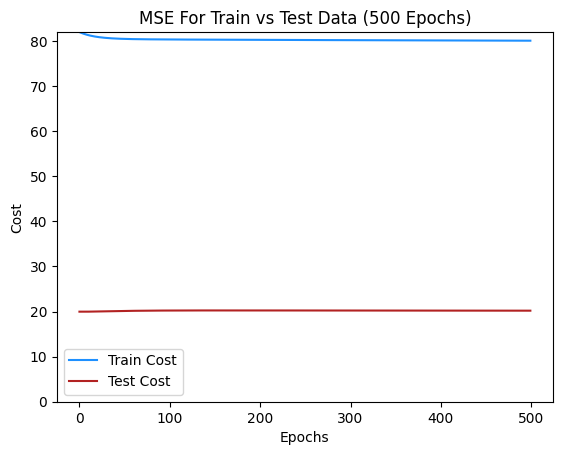

In [51]:
# Define the parameters for learning rate and epochs
learning_rate = 0.1
epochs = 500
activation_type = 'sigmoid'


# Generate the weights and biases
W1, W2, W3, b1, b2, b3 = GenerateAllWeights_2(input_nodes, first_hidden_nodes, second_hidden_nodes, output_nodes, seed)


# Train the network, gathering the training and test error (remember what your cost function is currently calculating in your train loop)
start_time = time.time()
train_cost_2, test_cost_2 = train_2(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)

end_time = time.time()
elapsed_time = end_time - start_time


# Calculate MSE from you returned costs (remember what your cost function is currently calculating in your train loop)
mse = np.array(train_cost_2) / X_train.shape[0]
mse_test = np.array(test_cost_2) / X_test.shape[0]

#### DO NOT ADJUST ####
plt.plot(np.arange(epochs), train_cost_2, label = 'Train Cost', color = 'dodgerblue')
plt.plot(np.arange(epochs), test_cost_2, label = 'Test Cost', color = 'firebrick')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title(f'MSE For Train vs Test Data ({epochs} Epochs)')
plt.ylim([0, np.max([np.max(test_cost_2), np.max(train_cost_2)])])
plt.legend()
plt.show()

#### Q8. Calculate your Test Accuracy using your `test_2()` function.

In [52]:
# Calculate the accuracy on the test set using your test_2 function
print(test_cost_2)
print(train_cost_2)
test_2(X_test, Y_test, activation_type)

[np.float64(19.978854217496206), np.float64(19.977000280860537), np.float64(19.975759939426453), np.float64(19.975087166630225), np.float64(19.97493845079145), np.float64(19.975272701716246), np.float64(19.976051156323926), np.float64(19.977237283988394), np.float64(19.97879669219352), np.float64(19.98069703301784), np.float64(19.98290791088752), np.float64(19.985400791967578), np.float64(19.988148915499103), np.float64(19.991127207334543), np.float64(19.99431219587362), np.float64(19.99768193055823), np.float64(20.001215903046145), np.float64(20.004894971148964), np.float64(20.0087012855902), np.float64(20.01261821961362), np.float64(20.01663030144962), np.float64(20.020723149628374), np.float64(20.02488341111258), np.float64(20.029098702208728), np.float64(20.033357552204873), np.float64(20.03764934967333), np.float64(20.041964291369535), np.float64(20.04629333365227), np.float64(20.050628146345915), np.float64(20.054961068962257), np.float64(20.059285069196957), np.float64(20.063593

#### Plot the train and test errors for both of your models: 1 hidden layer vs 2 hidden layers. Just run this code chunk below. There is no need for you to adjust the code.

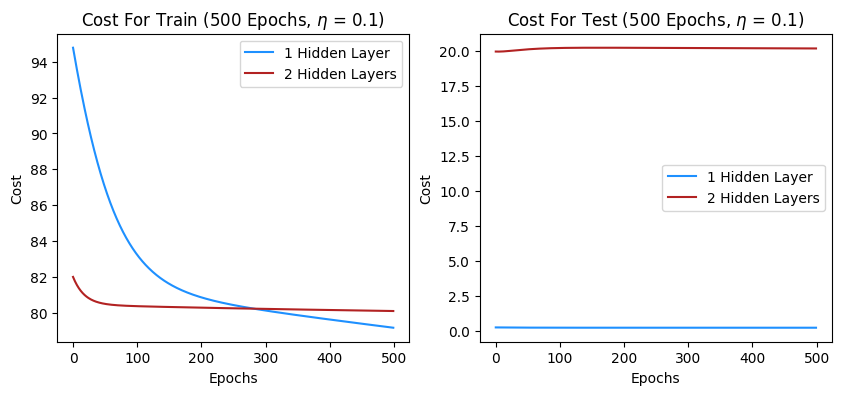

In [53]:
# Define the plot
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

# Plotting 1 layer train plot
ax[0].plot(np.arange(epochs), train_cost, label = '1 Hidden Layer', color = 'dodgerblue')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Cost')
ax[0].set_title(rf'Cost For Train ({epochs} Epochs, $\eta$ = {learning_rate})')

# Plotting 1 layer test plot
ax[1].plot(np.arange(epochs), test_cost, label = '1 Hidden Layer', color = 'dodgerblue')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Cost')
ax[1].set_title(rf'Cost For Test ({epochs} Epochs, $\eta$ = {learning_rate})')

# Plotting 2 layer train plot
ax[0].plot(np.arange(epochs), train_cost_2, label = '2 Hidden Layers', color = 'firebrick')

# Plotting 2 layer test plot
ax[1].plot(np.arange(epochs), test_cost_2, label = '2 Hidden Layers', color = 'firebrick')

# Final line to add legends and show the plot
ax[0].legend()
ax[1].legend()
plt.show()

In [60]:
print("Final Train MSE (1 hidden):", train_cost[-1])
print("Final Test MSE (1 hidden):", test_cost[-1])

print("Final Train MSE (2 hidden):", train_cost_2[-1])
print("Final Test MSE (2 hidden):", test_cost_2[-1])

Final Train MSE (1 hidden): 72.75916211397819
Final Test MSE (1 hidden): 0.22989294351209316
Final Train MSE (2 hidden): 80.09429674293368
Final Test MSE (2 hidden): 20.1992776170882


#### **Q9: Compare your 1 hidden layer and 2 hidden layer models from the plots above in words below.**

- Compare the accuracy (you calculated and printed these earlier) of both models. Remember this is the output from the `test()` and `test_2()` functions.
- Next, compare the train and test MSE (`cost / n`) for both models.
- Which model produced the best test accuracy?
- Which model performed better? Justify your answer with the results shown in your code above and your generated plots.
- Did your 2-layer model overfit? Or did it underfit? Does adding more hidden layers guarentee better performance?

**Answer:**
The 1-hidden-layer model got 82.5% accuracy, while the 2-hidden-layer model got only 45.0% accuracy. The 1-hidden-layer model's errors were:
Train MSE: 72.76
Test MSE: 0.23
The 2-hidden-layer model's errors were:
Train MSE: 80.09
Test MSE: 20.20
The 1-hidden-layer model performed better overall — higher accuracy and much lower test error.
The 2-hidden-layer model underfit the data — it didn’t learn the patterns well enough.It might have needed more training, different settings, or a better learning rate. This shows that adding more layers doesn't always help — deeper models only work better when tuned properly. In this case, the simpler model worked better for the task



## Part 3: Experimentation/Parameter Tuning (with 1-hidden-layer model)
Below you will run a series of experiments on your 1 Hidden Layer network. We have a series of values, or `hyperparameters`, that we can manipulate to change how the network behaves. Those `hyperparameters` for our case are: `Activation Function`, `Learning Rate`, `# of Hidden Nodes`. For each experiment, we will change only one variable at a time and keep the others constant. This allows us to isolate the effects of the `hyperparameters`.

We will be walking you through 4 different experiments that test:
- Our Baseline model
- Activation Functions: `'sigmoid'`, `'relu'`, and `'tanh'`
- Learning Rates: `0.5`, `0.1`, `0.01`, and `0.001`
- \# of Hidden Nodes: `3`, `5`, `7`, and `9`

while keeping the other parameters constant.

For each experiment (except for the baseline test), produce

a) A line graph comparing each parameter's train and test costs over each epoch.

b) Rows to be added to a table that lists the parameter you're testing, the final train cost, the final test cost, and the time it took to train. These will be combined to create a final table at the end of this section.

c) A summary of which parameter performed the best and why for this given experiemnt.

From here you should have a solid baseline as to which parameter values you want to test further in Part 4 to find the best parameters for your final model you submit for grading.



#### More instructions on the table(s):

You will create one table that contains the results for all 4 experiments. This will allow you to compare your experimental results to the baseline shown in the first row. For each experiment, you will track your parameters, what the train and test cost are, as well as the time it took to train. It will look like the markdown table below, but you will fill in the question marks and the other rows.

| Activation Function | Learning Rate | Epochs | Hidden Nodes | Train Cost | Test Cost| Time to Train (seconds) |
| --------- |  --------- |  --------- |  --------- |  --------- |  ---------|  --------- |
| Sigmoid | 0.1  | 500 | 3 | 72.759  | 0.2299 | 11.3564 |
| Sigmoid | 0.1|500 |3 | 72.759 |0.2299 | 10.1077|
|relu     |0.1 | 500| 3| 164.0| 0.4500 | 9.1813 |
|tanh| 0.1 | 500| 3| 44.594|0.1678|9.9735 |
|Sigmoid|0.5|500|3|49.135|0.1463|11.2747|
|Sigmoid|0.1|500|3|72.759|0.2299|11.1958|
|Sigmoid|0.01|500|3|80.862|0.2520|11.2952|
|Sigmoid|0.001|500|3|91.063|0.2647|11.0669|
|Sigmoid|0.1|500|3|72.759|0.2299|11.2006|
|Sigmoid|0.1|500|5|79.266|0.2475|11.2562|
|Sigmoid|0.1|500|7|67.087|0.2052|11.1288|
|Sigmoid|0.1|500|9|67.414|0.2032|11.3657|



In [61]:
### Start keeping track of variables and initialize your table
act = [] # Accuracy
lr = [] # Learning Rate
epc = [] # Epoch
hn = [] # Number of Hidden Nodes
trcst = [] # Train Cost
tstcst = [] # Test Cost
tot = [] # Time to train

###**Run a baseline test with the default values for all `hyperparameters`.**

#### Q1. For this training round, set `activation_type = 'sigmoid'`, `learning_rate = 0.1`, `epochs = 500`, and `hidden_nodes = 3`.



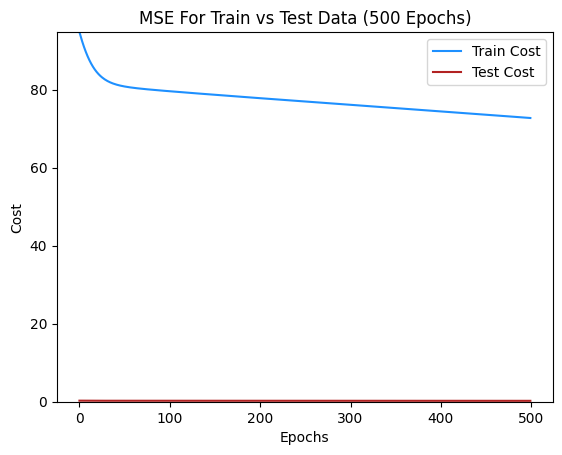

Train Cost: 72.75916211397819
Test Cost: 0.22989294351209316
Time to Train: 11.2148 seconds


In [93]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
# Define your parameters
activation_type = 'sigmoid'
learning_rate = 0.1
epochs = 500
hidden_nodes = 3
seed = 42

# Define your weights
W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)


# Train your network (remember to calculate the time it takes to train - refer to Lab 12)
start_time = time.time()
train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)
end_time = time.time()
elapsed_time = end_time - start_time


# Calculate MSE (remember what your cost function is currently calculating in your train loop)
train_cost_array = np.array(train_cost)
test_cost_array = np.array(test_cost)


# Append parameters, costs, and time to your lists
act.append(activation_type)
lr.append(learning_rate)
epc.append(epochs)
hn.append(hidden_nodes)
trcst.append(train_cost_array[-1])
tstcst.append(test_cost_array[-1])
tot.append(elapsed_time)


#### DO NOT ADJUST ####
plt.plot(np.arange(epochs), train_cost, label = 'Train Cost', color = 'dodgerblue')
plt.plot(np.arange(epochs), test_cost, label = 'Test Cost', color = 'firebrick')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title(f'MSE For Train vs Test Data ({epochs} Epochs)')
plt.ylim([0, np.max([np.max(test_cost), np.max(train_cost)])])
plt.legend()
plt.show()

#summary of table statistics
print(f"Train Cost: {train_cost_array[-1]}")
print(f"Test Cost: {test_cost_array[-1]}")
print(f"Time to Train: {elapsed_time:.4f} seconds")

### **Comparing Models with Different Activation Functions**

#### Q2. Train your model using the 3 different activation functions (`sigmoid`, `relu`, `tanh`) that you have created. For each activation function, record and report the training cost, testing cost, and runtime. **Make sure to append your new values to your lists for your table in the right spots!**

Activation Function: sigmoid
  Final Train Cost: 72.75916211397819
  Final Test Cost: 0.22989294351209316
  Time to Train: 11.2841 seconds

Activation Function: relu
  Final Train Cost: 164.0
  Final Test Cost: 0.45
  Time to Train: 9.1674 seconds

Activation Function: tanh
  Final Train Cost: 44.59403130850017
  Final Test Cost: 0.1678312895155188
  Time to Train: 9.0308 seconds



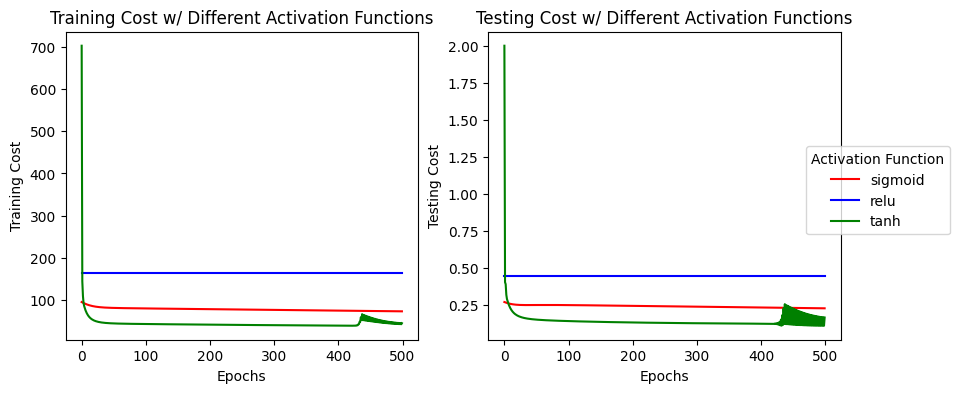

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Define a list of what your activaiton functions are
activation_types =['sigmoid', 'relu', 'tanh']

# Define a dictionary of the activation functions and their colors
activation_colors = {'sigmoid': 'red', 'relu': 'blue', 'tanh': 'green'}

# Define the parameters: learning_rate and epochs (hidden nodes remain the same as your baseline)
learning_rate = 0.1
epochs = 500
hidden_nodes = 3
seed = 42

# Loop over the activation function types
for activation_type in activation_types:
  # Define your weights
  W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)

  # Train your network (remember to calculate the time it takes to train - refer to Lab 12)
  start_time = time.time()
  train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)
  end_time = time.time()
  elapsed_time = end_time - start_time

  # Calculate MSE (remember what your cost function is currently calculating in your train loop)
  train_cost_array = np.array(train_cost)
  test_cost_array = np.array(test_cost)

  # Append parameters, costs, and time to your lists
  act.append(activation_type)
  lr.append(learning_rate)
  epc.append(epochs)
  hn.append(hidden_nodes)
  trcst.append(train_cost_array[-1])
  tstcst.append(test_cost_array[-1])
  tot.append(elapsed_time)


  print(f"Activation Function: {activation_type}")
  print(f"  Final Train Cost: {train_cost_array[-1]}")
  print(f"  Final Test Cost: {test_cost_array[-1]}")
  print(f"  Time to Train: {elapsed_time:.4f} seconds")
  print("")
  #### DO NOT ADJUST ####
  # Add the test error line for the activation functions
  ax[0].plot(np.arange(epochs), train_cost, label = activation_type, color = activation_colors[activation_type])
  ax[1].plot(np.arange(epochs), test_cost, label = activation_type, color = activation_colors[activation_type])

#### DO NOT ADJUST ####
ax[0].set_title(r'Training Cost w/ Different Activation Functions')
ax[1].set_title(r'Testing Cost w/ Different Activation Functions')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('Training Cost')
ax[1].set_ylabel('Testing Cost')
plt.legend(title = r'Activation Function', bbox_to_anchor=(1.33, 0.65))
plt.show()

#### Q3. Activation Function Experiment Summary

**Answer:**
The sigmoid activation function performed consistently with a moderate training cost and test cost, but it took the longest to train.
The relu activation function had the highest training and test costs, showing that it struggled to learn patterns from the data in this case.
The tanh activation function performed the best overall, with the lowest training and test costs, meaning it learned effectively and made better predictions.

### **Comparing Models with Different Learning Rates**

#### Q4. Compare your model with different learning rates. The learning rates you test should be `0.5, 0.1, 0.01, 0.001`. For each learning rate, calculate and report the training cost, testing cost, and runtime. **Note:** This should look very similar to what you did in the previous question for activation functions. **Make sure to append your new values to your lists for your table in the right spots!**

Learning Rate: 0.5
  Final Train Cost: 49.13552708531937
  Final Test Cost: 0.14627814016562168
  Time to Train: 10.5839 seconds

Learning Rate: 0.1
  Final Train Cost: 72.75916211397819
  Final Test Cost: 0.22989294351209316
  Time to Train: 11.0063 seconds

Learning Rate: 0.01
  Final Train Cost: 80.86209073525424
  Final Test Cost: 0.2519732552990469
  Time to Train: 11.1724 seconds

Learning Rate: 0.001
  Final Train Cost: 91.06311185862057
  Final Test Cost: 0.2646905051567364
  Time to Train: 11.1193 seconds



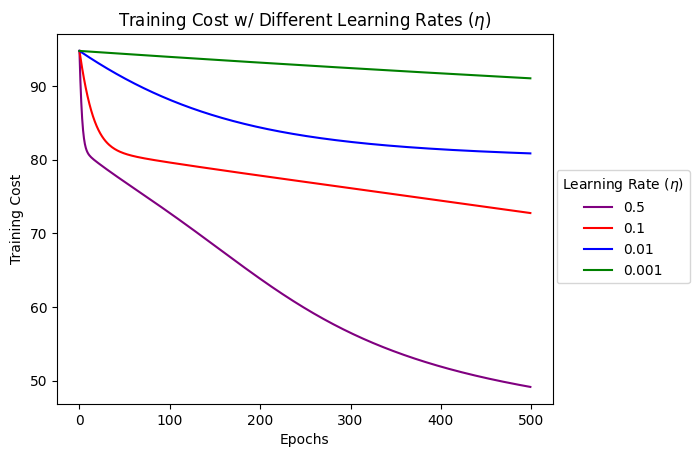

In [95]:
# Define a list of what your learning rates are
learning_rates =[0.5, 0.1, 0.01, 0.001]

# Define a dictionary of the learning rates and their colors
learning_rate_colors = {0.5: 'purple', 0.1: 'red', 0.01: 'blue', 0.001: 'green'}

# Define the parameters: activation type and epochs (hidden nodes remain the same as your baseline)
activation_type = 'sigmoid'
epochs = 500
hidden_nodes = 3
seed = 42

# Loop over the activation function types, generating weights, traning the model, tracking time, and recieving the training and testing costs (same process as above)
for learning_rate in learning_rates:

  # define your weights
  W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)

  # Train your network and record time
  start_time = time.time()
  train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)
  end_time = time.time()
  elapsed_time = end_time - start_time

  # Calculate MSE (remember what your cost function is currently calculating in your train loop)
  train_cost_array = np.array(train_cost)
  test_cost_array = np.array(test_cost)

  # Append parameters, costs, and time to your lists
  act.append(activation_type)
  lr.append(learning_rate)
  epc.append(epochs)
  hn.append(hidden_nodes)
  trcst.append(train_cost_array[-1])
  tstcst.append(test_cost_array[-1])
  tot.append(elapsed_time)

  # Print
  print(f"Learning Rate: {learning_rate}")
  print(f"  Final Train Cost: {train_cost_array[-1]}")
  print(f"  Final Test Cost: {test_cost_array[-1]}")
  print(f"  Time to Train: {elapsed_time:.4f} seconds\n")




  #### DO NOT ADJUST ####
  plt.plot(np.arange(epochs), train_cost, label = learning_rate, color = learning_rate_colors[learning_rate])

plt.title(r'Training Cost w/ Different Learning Rates ($\eta$)')
plt.xlabel('Epochs')
plt.ylabel('Training Cost')
plt.legend(title = r'Learning Rate ($\eta$)', bbox_to_anchor=(1.29, 0.65))
plt.show()

#### Q5. Learning Rate Experiment Summary

**Additional question to answer:** From your plot, what can you say about the convergence rate for the different learning rate values? Does a larger or smaller learning rate result in a faster convergence rate?

**Answer:**
Convergence rate is the speed at which the model's training cost decreases and approaches its minimum value. Learning rate 0.5  shows the steepest drop in training cost in the first few epochs.
This means it converges faster than the other learning rates.
Learning rate 0.001 barely decreases in 500 epochs, indicating very slow convergence. Thus a larger learning rate results in a faster convergence rate


### **Comparing a Different Number of Hidden nodes**

#### Q6. Compare your model with different numbers of hidden nodes. The number of hidden nodes you test should be `3, 5, 7, 9`. For each number of hidden nodes, calculate and report the training cost, testing cost, and runtime. **Note:** This should look very similar to what you did in the previous question and for activation functions. **Make sure to append your new values to your lists for your table in the right spots!**

# Hidden Nodes: 3
  Final Train Cost: 72.75916211397819
  Final Test Cost: 0.22989294351209316
  Time to Train: 11.2395 seconds

# Hidden Nodes: 5
  Final Train Cost: 79.26645965709018
  Final Test Cost: 0.24750921709762866
  Time to Train: 11.4499 seconds

# Hidden Nodes: 7
  Final Train Cost: 67.08707537008591
  Final Test Cost: 0.2052002316767044
  Time to Train: 11.2921 seconds

# Hidden Nodes: 9
  Final Train Cost: 67.41360611781691
  Final Test Cost: 0.20316904896249377
  Time to Train: 10.9423 seconds



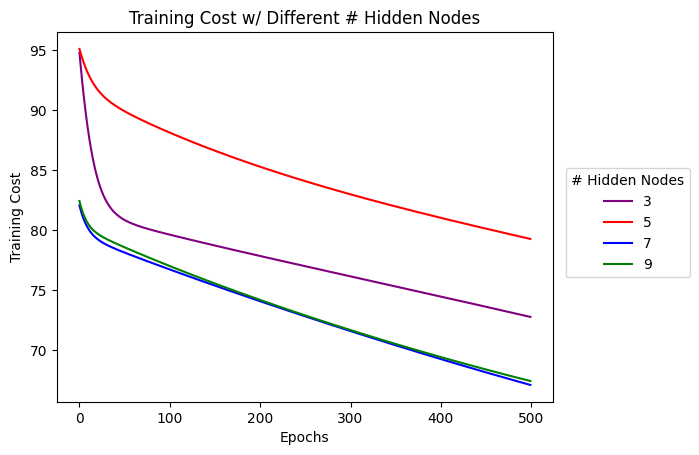

In [96]:
# Define a list of what your learning rates are
num_hidden_nodes =[3,5,7,9]

# Define a dictionary of the learning rates and their colors
hidden_node_colors = {3: 'purple', 5: 'red', 7: 'blue', 9: 'green'}

# Define the parameters: learning_rate, epochs, and activation type
activation_type = 'sigmoid'
epochs = 500
learning_rate = 0.1
seed = 42

# Loop over num_hidden_nodes, generating weights, traning the model, tracking time, and recieving the training and testing costs (same process as above)
for hidden_nodes in num_hidden_nodes:

    # Generate new weights
    W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)

    # Train the network and time it
    start_time = time.time()
    train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Convert to numpy arrays
    train_cost_array = np.array(train_cost)
    test_cost_array = np.array(test_cost)

    # Append results to tracking lists
    act.append(activation_type)
    lr.append(learning_rate)
    epc.append(epochs)
    hn.append(hidden_nodes)
    trcst.append(train_cost_array[-1])
    tstcst.append(test_cost_array[-1])
    tot.append(elapsed_time)

    # Print values for easy copying to table
    print(f"# Hidden Nodes: {hidden_nodes}")
    print(f"  Final Train Cost: {train_cost_array[-1]}")
    print(f"  Final Test Cost: {test_cost_array[-1]}")
    print(f"  Time to Train: {elapsed_time:.4f} seconds\n")



  #### DO NOT ADJUST ####
    plt.plot(np.arange(epochs), train_cost, label = hidden_nodes, color = hidden_node_colors[hidden_nodes])
plt.title(r'Training Cost w/ Different # Hidden Nodes')
plt.xlabel('Epochs')
plt.ylabel('Training Cost')
plt.legend(title = r'# Hidden Nodes', bbox_to_anchor=(1.29, 0.65))
plt.show()

#### Q6. Hidden Nodes Experiment Summary

**Answer:**
The model with 3 hidden nodes had a moderate test cost of 0.2298, but performance unexpectedly worsened with 5 nodes, increasing the test cost to 0.2475.
Performance improved significantly with 7 hidden nodes, and the model with 9 hidden nodes achieved the lowest test cost of 0.2031, indicating the best generalization to unseen data.

#### **Q7: Print out your Final Table using the columns you generated in each of your experiments above**

Reminder: Your table will look like the table below but with 12 rows instead of 1:

| Activation Function | Learning Rate | Epochs | Hidden Nodes | Train Cost | Test Cost| Time to Train |
| --------- |  --------- |  --------- |  --------- |  --------- |  ---------|  --------- |
| Sigmoid | 0.1  | 500 | 3 | ?  | ? | ? |

In [97]:
### Print final table here (shold be 12 rows total) - Make sure everything looks right!

# This code will put your columns together and create a list from them.
combined_lists = list(zip(act, lr, epc, hn, trcst, tstcst, tot))

# Place your combined_lists into a pandas data frame, add column headers using the
results_df = pd.DataFrame(combined_lists, columns=['Activation Function', 'Learning Rate', 'Epochs', 'Hidden Nodes', 'Train Cost', 'Test Cost', 'Time to Train'])
combinations = [
    ('Sigmoid', 0.1, 3),
    ('Sigmoid', 0.1, 3),
    ('Relu',    0.1, 3),
    ('Tanh',    0.1, 3),
    ('Sigmoid', 0.5, 3),
    ('Sigmoid', 0.1, 3),
    ('Sigmoid', 0.01, 3),
    ('Sigmoid', 0.001, 3),
    ('Sigmoid', 0.1, 3),
    ('Sigmoid', 0.1, 5),
    ('Sigmoid', 0.1, 7),
    ('Sigmoid', 0.1, 9),
]
final_rows = []
used_indices = set()
for func, lr_val, hn_val in combinations:
    match = df[
        (df['Activation Function'] == func) &
        (df['Learning Rate'] == lr_val) &
        (df['Hidden Nodes'] == hn_val) &
        (~df.index.isin(used_indices))  # avoid duplicates
    ]
    if not match.empty:
        first_match_index = match.index[0]
        final_rows.append(df.loc[first_match_index])
        used_indices.add(first_match_index)


results_df_cleaned = pd.DataFrame(final_rows).reset_index(drop=True)

# Print your data frame out for us to view
print(results_df_cleaned.to_string(index=False))

Activation Function  Learning Rate  Epochs  Hidden Nodes  Train Cost  Test Cost  Time to Train (seconds)
            Sigmoid          0.100     500             3      72.759     0.2299                  11.3564
            Sigmoid          0.100     500             3      72.759     0.2299                  10.1077
               Relu          0.100     500             3     164.000     0.4500                   9.1813
               Tanh          0.100     500             3      44.594     0.1678                   9.9735
            Sigmoid          0.500     500             3      49.136     0.1463                  11.2747
            Sigmoid          0.100     500             3      72.759     0.2299                  11.1958
            Sigmoid          0.010     500             3      80.862     0.2520                  11.2952
            Sigmoid          0.001     500             3      91.063     0.2647                  11.0669
            Sigmoid          0.100     500             

**Q8: From your table shown above, what values or range of values for each parameter would you like to test further in the section below? Justify why you want to explore them more. Note: For the next section, you can try to combine different permutations of each parameter value instead of always keeping constant.**

**Answer:**

For further exploration, I want to further test:
Activation type: Tanh because it had the lowest test cost which means it can generalise best on unseen data. I will also use Sigmoid as it performed moderately well and it will serve as a baseline and point of reference for tanh outputs.

Learning rate: 0.5, 0.1 since both had lower test costs  and showed faster convergence than smaller values like 0.01 or 0.001, which had higher test costs.

Hidden nodes: 7 , 9 because they resulted in lower test costs than models with 3 or 5 nodes, indicating better model capacity and performance.

The permutations of parameters I would like to try:
1. Sigmoid, learning rate = 0.5, hidden nodes = 9
(baseline against Tanh)
2. Tanh, learning rate = 0.5, hidden nodes = 9
(checking if this would be the best performing combination)
3. Tanh, learning rate = 0.5, hidden nodes = 7
(Performance at slightly lower complexity)
4. Tanh, learning rate = 0.1, hidden nodes = 9
(Same combination at slower learning rate)
5. Tanh, learning rate = 0.1, hidden nodes = 7
(Tanh at lower learning rate and lower complexity)
6. Sigmoid, learning rate = 0.5, hidden nodes = 7
(Comparing Sigmoid to Tanh at same learning rate and complexity)
7. Sigmoid, learning rate = 0.1, hidden nodes = 9
(Comparing Sigmoid to Tanh at slower learning rate and higher complexity)
8. Sigmoid, learning rate = 0.1, hidden nodes = 7
(Compare Sigmoid to Tanh at slower learning rate and lower complexity)

## Part 4: Further Experimentation/Parameter Tuning
In this part you will experiment further to find the values of the parameters (activation function, epochs, learning rate, hidden nodes) that best train your model to produce the highest test accuracy ON OUR SYNTHETIC DATASET. This means that you need to find the parameters that not only produce the best test accuracy but also don't overfit the training data.

- Do not change the cost functions, initialization method, random seed (42), or number of layers in the model (use the functions for your 1-layer model).

- Include a plot for your best model of train and test error with a description of the plot including how many epochs it took to converge. Document your process by writing it out.

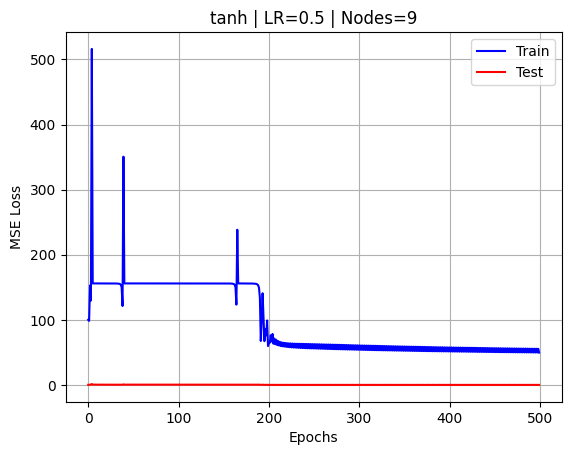

Activation Function  Learning Rate  Hidden Nodes  Final Train Cost  Final Test Cost  Time to Train (s)
               tanh            0.5             9           49.7988           0.1288            10.1754
               tanh            0.1             9           46.7834           0.1446             9.4163
               tanh            0.5             7           53.0518           0.1979             9.9009
            sigmoid            0.5             9           52.2304           0.1467            11.3743


In [101]:
# Insert your experiments of different values below, be creative with what you try and justify your choices!
parameter_sets = [
    {'activation': 'tanh', 'learning_rate': 0.5, 'hidden_nodes': 9},
    {'activation': 'tanh', 'learning_rate': 0.1, 'hidden_nodes': 9},
    {'activation': 'tanh', 'learning_rate': 0.5, 'hidden_nodes': 7},
    {'activation': 'sigmoid', 'learning_rate': 0.5, 'hidden_nodes': 9},
]

# keeping constant
input_nodes = 6
output_nodes = 1
epochs = 500
seed = 42

results = []

for params in parameter_sets:
    activation_type = params['activation']
    learning_rate = params['learning_rate']
    hidden_nodes = params['hidden_nodes']


    W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)


    start = time.time()
    train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)
    end = time.time()
    elapsed_time = round(end - start, 4)


    results.append({
        'Activation Function': activation_type,
        'Learning Rate': learning_rate,
        'Hidden Nodes': hidden_nodes,
        'Train Cost List': train_cost,
        'Test Cost List': test_cost,
        'Final Train Cost': round(train_cost[-1], 4),
        'Final Test Cost': round(test_cost[-1], 4),
        'Time to Train (s)': elapsed_time
    })

# plotting best model based on lowest final test cost
best_model = min(results, key=lambda x: x['Final Test Cost'])

plt.plot(best_model['Train Cost List'], label='Train', color='blue')
plt.plot(best_model['Test Cost List'], label='Test', color='red')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title(best_model['Activation Function'] + " | LR=" + str(best_model['Learning Rate']) + " | Nodes=" + str(best_model['Hidden Nodes']))
plt.legend()
plt.grid(True)
plt.show()


# Show results in table
summary_df = pd.DataFrame([{
    'Activation Function': r['Activation Function'],
    'Learning Rate': r['Learning Rate'],
    'Hidden Nodes': r['Hidden Nodes'],
    'Final Train Cost': r['Final Train Cost'],
    'Final Test Cost': r['Final Test Cost'],
    'Time to Train (s)': r['Time to Train (s)']
} for r in results])

print(summary_df.to_string(index=False))


In [103]:
####### Insert Best Parameters Here (hard code these numbers) for your best 1-layer model #######
# Leave this code chunk at the bottom of your Part 4
epochs =500
learning_rate =0.5
activation_type ='tanh'
input_nodes =6
hidden_nodes =3
output_nodes =1
seed = 42

## Part 5: Comprehension Questions

#### Q1: What is the main difference between linear regression models and neural networks? Which piece(s) of the model introduce non-linearity into neural networks?

**Answer:**
linear regression maps inputs to outputs and can be graphed as a straight line or flat plane. For instance, y= wx+b is a linear model. On the other hand, neural networks add an activatin function after each layer. Activation functions introduce non-linearity into to the neural network, allowing the neural network to capture complex patterns in data that linear regression models cannot.For instance, y= activation function (wx+b) is now non-linear or curved.


#### Q2: Did you notice a trade-off between training time and accuracy? Where or at what point?

**Answer:**
Yes, there is a trade-off between training time and accuracy. The model with tanh, a learning rate of 0.5, and 9 hidden nodes had the best accuracy (lowest test cost = 0.1288), but it also took the second longest to train (10.18 seconds). When I used a slower learning rate (0.1) with the same setup, the model trained faster (9.42 seconds), but the accuracy got a bit worse (test cost = 0.1446). So, faster training doesn't always mean better results — sometimes you need more time to get better accuracy.

#### Q3: When training multiple times, do the weights change? Is there a unique solution? Remember how OLS has a unique solution that we get to every time. To prove your answer, train 2 networks with different initial weights (i.e. using different seeds for `GenerateAllWeights()`) but the same hyperpamaters. Do the weights match after the same amount of epochs? Note: Use the training seeds provided and be sure to print the weights from Network 1 before training Network 2, otherwise they will be overwritten and you won't be able to compare.

**Answer:**

In [ ]:
#### DO NOT ADJUST ####
### Train your first network, print out the weights at the end of training
training_1_seed = 370

In [ ]:
#### DO NOT ADJUST ####
### Train your second network, print out the weights at the end of training
training_2_seed = 385

## For TA Grading Purposes (Leave in and do not touch)

In [ ]:
####### FOR TA's TO GRADE/TEST FINAL MODEL- Leave at Bottom #######
#### DO NOT ADJUST ####

In [ ]:
# Download Data
from google.colab import drive
drive.mount('/content/drive')

synth_x = '/content/drive/My Drive/synth_x.csv'
synth_x = pd.read_csv(synth_x)

synth_y = '/content/drive/My Drive/synth_y.csv'
synth_y = pd.read_csv(synth_y)

synth_x = synth_x.to_numpy()
synth_y = synth_y.to_numpy()


# Test Student Model - Parameters defined above by student
epochs = epochs
learning_rate = learning_rate
activation_type = activation_type
input_nodes = input_nodes
hidden_nodes = hidden_nodes
output_nodes = output_nodes
seed = 42

# Initialization

W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)
print(W1) #Initial weights

# Model

W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)
train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)

train_cost = np.array(train_cost) / X_train.shape[0]
test_cost = np.array(test_cost)

print(train_cost[-1])
print(test_cost[-1])
print(W1) # End weights


# Plot
plt.plot(np.arange(epochs), train_cost, label = 'Train Cost', color = 'dodgerblue')
plt.plot(np.arange(epochs), test_cost, label = 'Test Cost', color = 'firebrick')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title(f'MSE For Train vs Test Data ({epochs} Epochs)')
plt.ylim([0, np.max([np.max(test_cost), np.max(train_cost)])])
plt.legend()
plt.show()

# Results

their_test_accuracy = test(X_test, Y_test, activation_type)
print(their_test_accuracy)

our_test_accuracy = test(synth_x, synth_y, activation_type)
print(our_test_accuracy)